## Introduction

In this particular kernel, we will be exploring ‘Iris’ dataset, create the Decision Tree classifier and
visualize it graphically. The purpose is if we feed any new data to this
classifier, it would be able to predict the right class accordingly.


## Step 1: Importing required libraries and the dataset


In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [114]:
df_iris=pd.read_csv('Iris.csv')
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Step 2: Data cleaning

1. Id column is unnecessary and hence, we will drop it. 

2. word Iris has been repeated every time which provides no extra info. Hence, we will remove the iris word from the Species column.

In [115]:
df_iris.drop('Id',axis=1, inplace = True)
df_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [116]:
df_iris['Species']=df_iris.Species.str.rsplit('-',expand=True)[1]
df_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Step 3: Data visualization

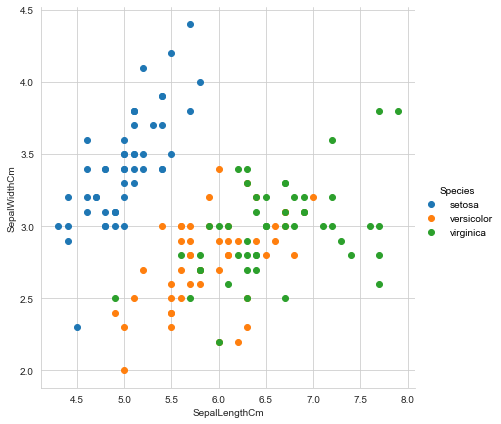

In [117]:
#FacetGrid 

sns.FacetGrid(df_iris, hue="Species", height=6) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()
plt.show()

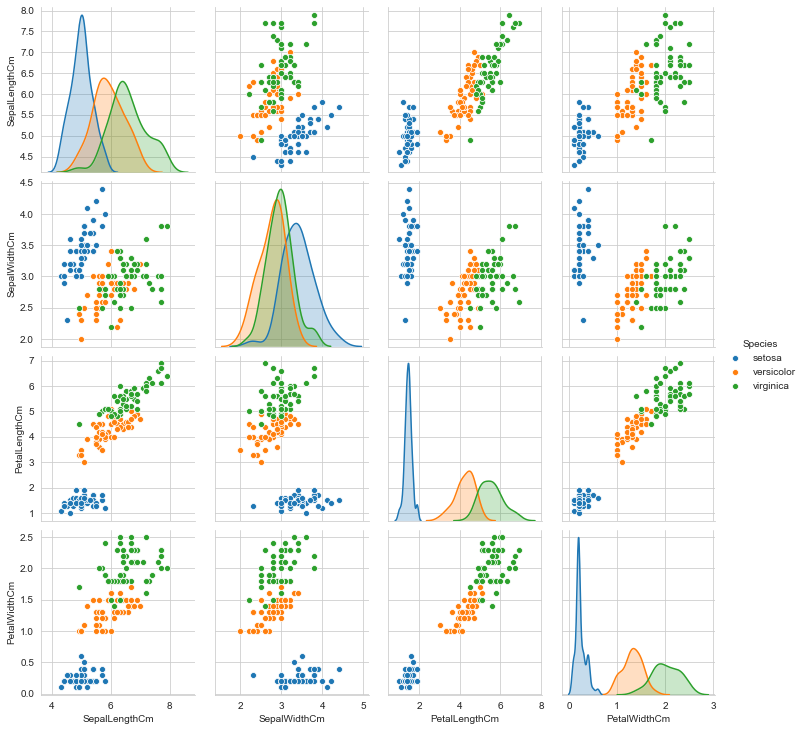

In [118]:
# pairplot using seaborn which shows the bivariate relation between each pair of features

sns.set_style("whitegrid");
sns.pairplot(data=df_iris, hue="Species");

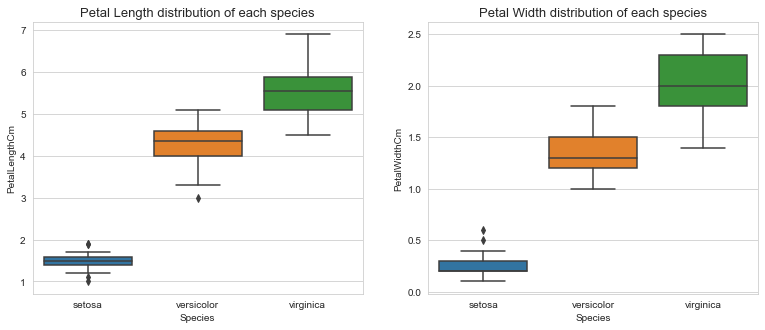

In [119]:
# To plot the species data using a box plot:
fig3=plt.figure(figsize=(13,5))


ax=fig3.add_subplot(121)
sns.boxplot(x="Species", y="PetalLengthCm",ax=ax, data=df_iris )
ax.set_title('Petal Length distribution of each species',size=13)


ax1=fig3.add_subplot(122)
sns.boxplot(x="Species", y="PetalWidthCm",ax=ax1, data=df_iris )
ax1.set_title('Petal Width distribution of each species',size=13);

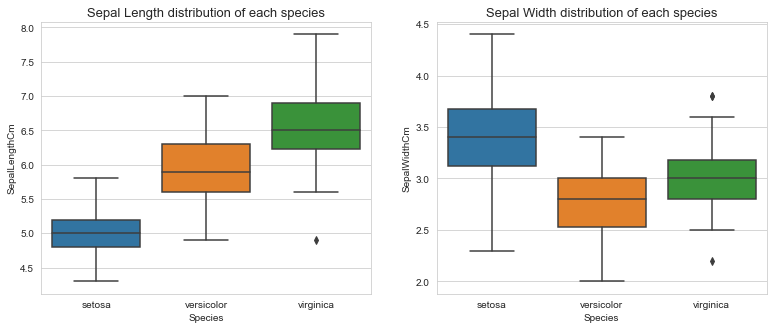

In [120]:
fig3=plt.figure(figsize=(13,5))


ax=fig3.add_subplot(121)
sns.boxplot(x="Species", y="SepalLengthCm",ax=ax, data=df_iris )
ax.set_title('Sepal Length distribution of each species',size=13)


ax1=fig3.add_subplot(122)
sns.boxplot(x="Species", y="SepalWidthCm",ax=ax1, data=df_iris )
ax1.set_title('Sepal Width distribution of each species',size=13);

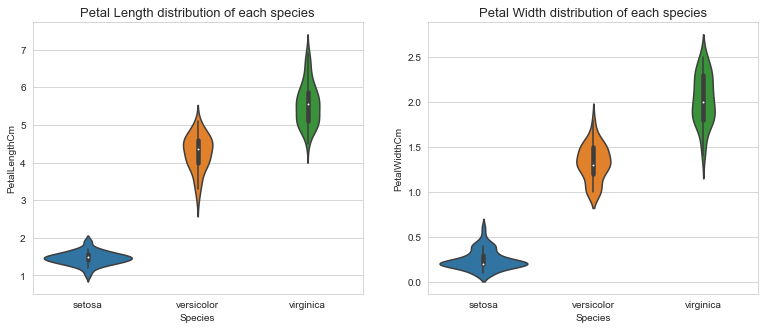

In [54]:
# To plot the species data using a violin plot:
fig3=plt.figure(figsize=(13,5))


ax2=fig3.add_subplot(121)
sns.violinplot(x="Species", y="PetalLengthCm", ax=ax2 ,data=df_iris, size=6)
ax2.set_title('Petal Length distribution of each species',size=13)

ax3=fig3.add_subplot(122)
sns.violinplot(x="Species", y='PetalWidthCm', ax=ax3 ,data=df_iris, size=6)
ax3.set_title('Petal Width distribution of each species',size=13);




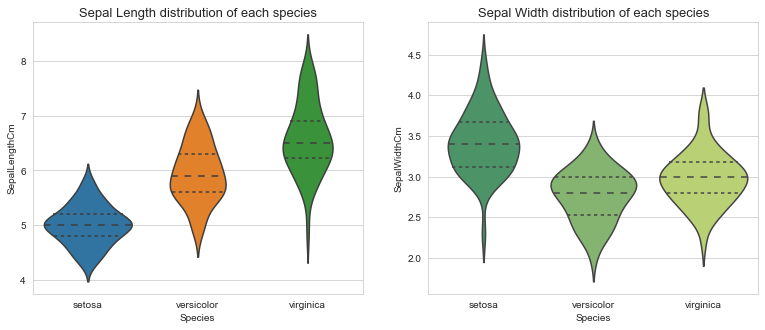

In [55]:
# violin plot with quartile

fig3=plt.figure(figsize=(13,5))

ax5=fig3.add_subplot(121)
sns.violinplot(x='Species',y='SepalLengthCm',data=df_iris,ax=ax5,orient='v',inner='quartile')
ax5.set_title('Sepal Length distribution of each species',size=13)

ax6=fig3.add_subplot(122)
sns.violinplot(x='Species',y='SepalWidthCm',data=df_iris,ax=ax6,orient='v',inner='quartile',palette='summer')
ax6.set_title('Sepal Width distribution of each species',size=13);


### encode the targets 
Setosa as 1
Virginica as 2
Versicolor as 3

In [63]:
df_iris['Species']=df_iris['Species'].replace('setosa',1)
df_iris['Species']=df_iris['Species'].replace('virginica',2)
df_iris['Species']=df_iris['Species'].replace('versicolor',3)

In [64]:
# split X and y
targets=df_iris['Species']
df_iris.drop('Species',axis=1,inplace=True)

In [65]:
X=df_iris
y=targets

## Now let us define the Decision Tree Algorithm

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [69]:
#split the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,shuffle=True)

In [70]:
#fit the train and test data
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


In [71]:
#prediction 
y_preds=dtree.predict(X_test)
dtree.score(X_test,y_test)

0.9736842105263158

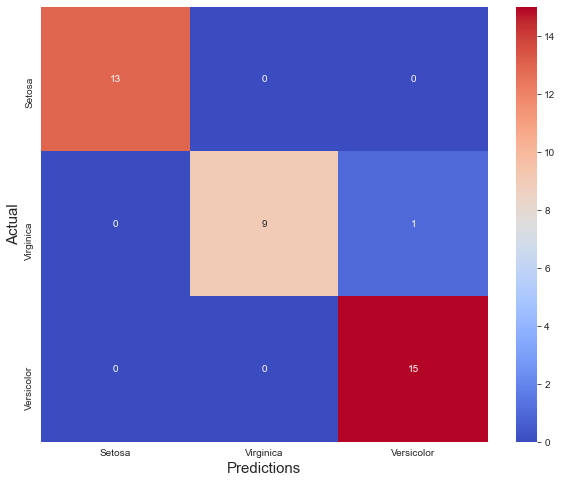

In [89]:
# heatmap confusion matrix

conf_mat=confusion_matrix(y_preds,y_test)
fig6=plt.figure(figsize=(10,8))
ax9=fig6.add_subplot(111)

sns.heatmap(conf_mat,annot=True,cmap='coolwarm',ax=ax9)
ax9.xaxis.set_ticklabels(['Setosa','Virginica','Versicolor'])
ax9.yaxis.set_ticklabels(['Setosa','Virginica','Versicolor'])
plt.xlabel('Predictions',size=15)
plt.ylabel('Actual',size=15);

we can see from the above heatmap, only one particular instance was incorrectly classifide by the decision tree.
i.e verginica classified as vesicolor

In [105]:
# check which features were important in prediction

dtree.fit(X_train,y_train)
col_arr=np.array(X.columns).reshape(-1,1)
df_imp=pd.DataFrame(col_arr)
df_imp.rename(columns={0:'Feature'},inplace=True)
imp=(100*dtree.feature_importances_)
df_imp['Importance']=imp
df_imp

,Feature,Importance
0,SepalLengthCm,2.014872
1,SepalWidthCm,2.014872
2,PetalLengthCm,90.597266
3,PetalWidthCm,5.372991


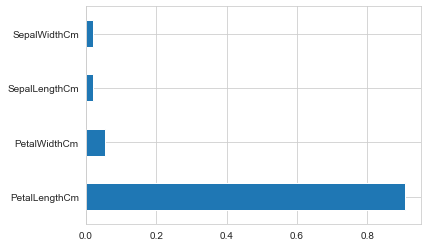

In [106]:
(pd.Series(dtree.feature_importances_, index=X.columns)
   .nlargest(10)
   .plot(kind='barh')) ;

## Let us visualize the Decision Tree to understand it better.

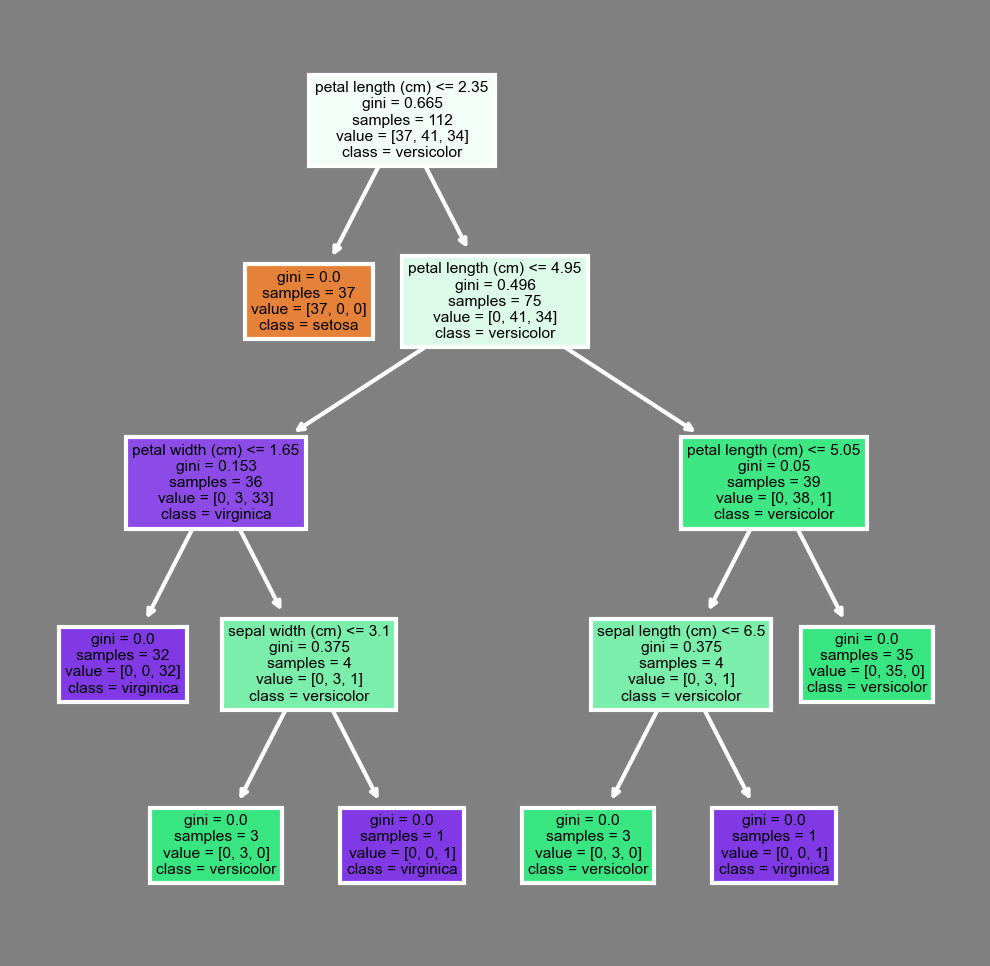

<Figure size 720x576 with 0 Axes>

In [121]:

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300, facecolor='grey')
mpl.rcParams['text.color'] = 'black'
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']

plt.figure(figsize=(10,8))
from sklearn import tree
tree.plot_tree(dtree,feature_names = fn, 
               class_names=cn,filled=True,ax=axes);